In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
from sklearn import model_selection, metrics, preprocessing




In [ ]:
bookData = pd.read_csv("/content/Books.csv", low_memory=False)
userData = pd.read_csv("/content/Users.csv", low_memory=False)
ratingData = pd.read_csv("/content/Ratings.csv", low_memory=False)

In [ ]:
bookData = bookData.dropna()
userData = userData.dropna()
ratingData = ratingData.dropna()
ratingData= ratingData[ (ratingData['Book-Rating'] >0)]
print('Books shape   : ',bookData.shape)
print('Ratings shape :',ratingData.shape)
print('Users shape   :',userData.shape)

Books shape   :  (217881, 8)
Ratings shape : (433671, 3)
Users shape   : (168096, 3)


In [ ]:
ratings = ratingData.merge(bookData, on='ISBN')

In [ ]:
ratings['Book-Title'] = ratings['Book-Title'].replace(to_replace='\$', value='', regex=True)

In [ ]:
user_node =ratings['User-ID'].unique()
book_node =ratings['Book-Title'].unique()

In [ ]:
ratings = ratings[["User-ID","Book-Title","Book-Rating","ISBN"]]
ratings100 = ratings.head(20)

In [ ]:
G = nx.Graph()
user_nodes=list(ratings100['User-ID'])
book_nodes=list(ratings100['Book-Title'])
# Add nodes with the node attribute "bipartite"

G.add_nodes_from(user_nodes, bipartite=0)
G.add_nodes_from(book_nodes, bipartite=1)


weights = []
for index, row in ratings100.iterrows():
    G.add_edge(row["User-ID"], row["Book-Title"], weight=row["Book-Rating"])
    weights.append(row["Book-Rating"])
bipartite.is_bipartite(G)

zip_list=list(zip(user_nodes,book_nodes))
dict_of_labels = dict()
for i in range(len(zip_list)):
    dict_of_labels[zip_list[i]]=weights[i]

plt.figure(figsize=(15, 10))

pos = nx.bipartite_layout(G, user_nodes)


<Figure size 1500x1000 with 0 Axes>

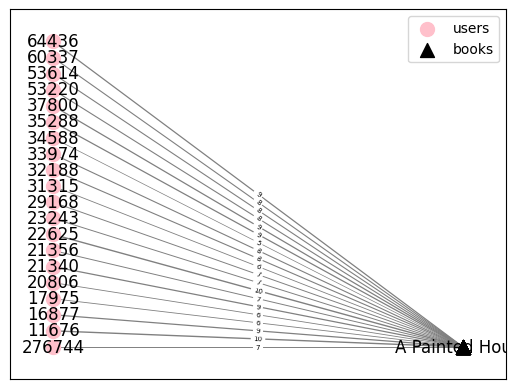

In [ ]:
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='pink', node_shape='o', label='users', node_size=100)
nx.draw_networkx_nodes(G, pos, nodelist=book_nodes, node_color='black', node_shape='^', label='books',node_size=100)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=[d['weight']*0.1 for (u, v, d) in G.edges(data=True)])

nx.draw_networkx_edge_labels(G, pos, edge_labels=dict_of_labels, font_size=5)
nx.draw_networkx_labels(G, pos)

plt.legend()
plt.show()


In [ ]:
lbl_user = preprocessing.LabelEncoder()
lbl_movie = preprocessing.LabelEncoder()

ratings["User-ID"] = lbl_user.fit_transform(ratings["User-ID"].values)
ratings["ISBN"] = lbl_movie.fit_transform(ratings.ISBN.values)

In [ ]:
ratings.head()

,User-ID,Book-Title,Book-Rating,ISBN
0,37777,A Painted House,7.0,12670
1,2707,A Painted House,10.0,12670
2,3910,A Painted House,9.0,12670
3,4157,A Painted House,6.0,12670
4,4801,A Painted House,6.0,12670
